In [1]:
import numpy as np
import pandas as pd
import fitsio
import os
import glob
import matplotlib.pyplot as plt

In [2]:
def list_exps(date):
    exps_daily = pd.read_csv("/global/cfs/cdirs/desi/spectro/redux/daily/exposures-daily.csv")
    #print(exps_daily.keys())
    ii = (exps_daily["NIGHT"]==date)
    #print(exps_daily["NIGHT"][ii])
    exps_daily = exps_daily[ii]
    return exps_daily

In [3]:
def read_sky_sframe(sframe_file):
    #print(sframe_file)
    try:
        h = fitsio.FITS(sframe_file)
        sel = h["FIBERMAP"]["OBJTYPE"].read() == "SKY"
        sky = h["FLUX"].read()[sel,:]
    except:
        sky = None
    return sky

In [4]:
def compute_sframe_difference(data_release_path, daily_path, date, expid):
    n_petals = 10
    bands = ['b', 'r', 'z']
    summary = {}
    summary['band'] = []
    summary['petal'] = []
    summary['diff_mean'] = []
    summary['diff_std'] = []
    summary['expid'] = []
    summary['night'] = []
    for i in range(n_petals):
        for band in bands:
            filename_A = '{}/{}/{:08d}/sframe-{}{}-{:08d}.fits'.format(data_release_path, date, expid, band, i, expid)
            sky_petal_A = read_sky_sframe(filename_A)
            filename_B = '{}/{}/{:08d}/sframe-{}{}-{:08d}.fits'.format(daily_path, date, expid, band, i, expid)
            sky_petal_B = read_sky_sframe(filename_B)
            if sky_petal_A is not None and sky_petal_B is not None:
                sky_diff = sky_petal_B-sky_petal_A
           #     proba = ient.compute_probability_distribution_2D(sky_petal)
           #     entropy =  ient.compute_entropy(proba)
                summary['band'].append(band)
                summary['petal'].append(i)
                summary['diff_mean'].append(sky_diff.mean())
                summary['diff_std'].append(sky_diff.std())
                summary['expid'].append(expid)
                summary['night'].append(date)
                print(date, expid, band, i, sky_diff.mean(), sky_diff.std())
    entropy_df = pd.DataFrame.from_dict(summary)
    filename = 'sky_diff_sframe_{}_{:08d}.csv'.format(date, expid)
    
    #os.makedirs(output_path, exist_ok=True) 
    entropy_df.to_csv(filename)
    
    #print(summary)

In [8]:
def data_comparison_release_vs_daily(data_release_path, daily_path, date):
    exps = list_exps(date)
    # compute differences
    dates = list(exps["NIGHT"])
    expids = list(exps["EXPID"])
    for date, expid in zip(dates, expids):
        compute_sframe_difference(data_release_path, daily_path, date, expid)

In [9]:
iron_path = '/global/cfs/cdirs/desi/spectro/redux/iron/exposures/'
daily_path = '/global/cfs/cdirs/desi/spectro/redux/daily/exposures/'
date = 20220613
data_comparison_release_vs_daily(iron_path, daily_path, date)

20220613 139619 b 0 -4.233976 17.913216
20220613 139619 r 0 0.41294488 265.90222
20220613 139619 z 0 2.522392 211.4307
20220613 139619 b 1 -0.55841064 255.66995
20220613 139619 r 1 26090.055 14187035.0
20220613 139619 z 1 1.7068943 171.08667
20220613 139619 b 2 0.617957 18.51607
20220613 139619 r 2 17.590208 937.751
20220613 139619 z 2 2.358377 31.310665
20220613 139619 b 3 -2.508702 1361.8452
20220613 139619 r 3 0.24821724 129.26263
20220613 139619 z 3 1.7964903 138.46347
20220613 139619 b 4 -1.1212081 16.35812
20220613 139619 r 4 5.4414334 2074.854
20220613 139619 z 4 1.2854996 9.935367
20220613 139619 b 5 -0.93401253 67.02277
20220613 139619 r 5 1.4539824 17.339376
20220613 139619 z 5 3.796261 11.729932
20220613 139619 b 6 2.9745321 16.929237
20220613 139619 r 6 2.559445 120.74567
20220613 139619 z 6 2.2381318 326.45007
20220613 139619 b 7 0.14461261 17.502422
20220613 139619 r 7 6.841458 1465.9619
20220613 139619 z 7 2.3886187 76.77307
20220613 139619 b 8 -0.7425072 15.648967
20220

In [10]:
date = 20220430
data_comparison_release_vs_daily(iron_path, daily_path, date)

20220430 132515 b 0 2.0982528 7.9751
20220430 132515 r 0 -0.037562758 14.287738
20220430 132515 z 0 0.17285113 20.748081
20220430 132515 b 1 1.5916309 6.077407
20220430 132515 r 1 0.41691062 45.526787
20220430 132515 z 1 -0.004275577 26.632607
20220430 132515 b 2 0.7909543 6.773434
20220430 132515 r 2 5.182853 276.24707
20220430 132515 z 2 1.3186921 30.591896
20220430 132515 b 3 -1.0491254 95.43782
20220430 132515 r 3 -0.102105714 60.43312
20220430 132515 z 3 1.1344197 63.680656
20220430 132515 b 4 0.94275874 6.339256
20220430 132515 r 4 2.0666394 58.79476
20220430 132515 z 4 1.1464806 185.3346
20220430 132515 b 5 1.0916301 8.9409075
20220430 132515 r 5 0.7919181 14.976147
20220430 132515 z 5 2.0638325 54.691372
20220430 132515 b 6 -0.13376527 10.701092
20220430 132515 r 6 -0.7372826 68.43958
20220430 132515 z 6 1.2526805 64.48831
20220430 132515 b 7 -1.1029798 6.7731705
20220430 132515 r 7 1.359975 379.6173
20220430 132515 z 7 0.43594152 20.454412
20220430 132515 b 8 -0.40103304 25.25

In [11]:
date = 20210606
data_comparison_release_vs_daily(iron_path, daily_path, date)

20210606 91372 b 0 0.13434328 7.837783
20210606 91372 r 0 0.48599854 48.05965
20210606 91372 z 0 0.15038623 107.07878
20210606 91372 b 1 0.12708643 7.210134
20210606 91372 r 1 0.24970935 148.37363
20210606 91372 z 1 -0.07999853 107.26742
20210606 91372 b 2 -0.22369957 7.7396374
20210606 91372 r 2 -0.21384655 85.014435
20210606 91372 z 2 0.19483435 59.80469
20210606 91372 b 3 0.52516437 7.899163
20210606 91372 r 3 -0.50811005 164.64455
20210606 91372 z 3 0.17094904 162.984
20210606 91372 b 4 -0.34541407 7.85499
20210606 91372 r 4 -0.26225635 80.79182
20210606 91372 z 4 -1.0297345 134.13121
20210606 91372 b 5 0.020793827 9.888261
20210606 91372 r 5 -0.2927966 199.31339
20210606 91372 z 5 -0.26751164 39.09972
20210606 91372 b 6 0.12210518 13.170432
20210606 91372 r 6 0.51478654 326.8572
20210606 91372 z 6 0.873804 356.61578
20210606 91372 b 7 -0.25235224 6.42218
20210606 91372 r 7 0.051660974 58.80659
20210606 91372 z 7 -0.45318148 250.34044
20210606 91372 b 8 -0.071705416 6.946125
202106

In [69]:
date = 20211111
data_comparison_release_vs_daily(iron_path, daily_path, date)

20211111 108404 b 0 -0.07468563 3.1596901
20211111 108404 r 0 0.66150355 133.5546
20211111 108404 z 0 -0.50041705 114.76379
20211111 108404 b 1 0.121914 3.277354
20211111 108404 r 1 -0.73081875 146.47644
20211111 108404 z 1 -0.00048557168 59.395313
20211111 108404 b 2 0.22000119 3.0218258
20211111 108404 r 2 0.015986182 78.23748
20211111 108404 z 2 0.07980686 12.285641
20211111 108404 b 3 -0.15015927 50.03105
20211111 108404 r 3 -0.069246754 42.334045
20211111 108404 z 3 -0.09529407 32.25693
20211111 108404 b 4 0.029958023 3.2783246
20211111 108404 r 4 1.648969 49.475735
20211111 108404 z 4 0.12363354 44.83193
20211111 108404 b 5 0.1593106 3.5694265
20211111 108404 r 5 0.014679357 5.2589674
20211111 108404 z 5 -0.82959646 44.615074
20211111 108404 b 6 0.07920744 2.8812952
20211111 108404 r 6 0.11803855 13.380064
20211111 108404 z 6 0.007980681 16.595253
20211111 108404 b 7 0.11733049 2.997112
20211111 108404 r 7 0.17461652 10.908917
20211111 108404 z 7 0.1852449 62.96532
20211111 10840

In [90]:
#plot 
def plot_differences(date):
    plt.figure(figsize=(10,3))
    diff_files = glob.glob('sky_diff_sframe_{}_*'.format(date))
    
    mean = []
    std = []
    for diff_file in diff_files:
        sky_diff = pd.read_csv(diff_file)
        mean = mean+list(sky_diff['diff_mean'])
        std = std+list(sky_diff['diff_std'])
    mean = np.array(mean)
    std = np.array(std)
    
    plt.subplot(1,3,1)
    plt.semilogy()
    plt.scatter(mean, std, color='black', alpha=0.4)
    #plt.title('sky sframe differences (Daily - Iron). night {}'.format(date))
    plt.xlabel('Mean')
    plt.ylabel('Standard Deviation')
    plt.xlim(-5,5)
    plt.ylim(1,10000)
    
    plt.subplot(1,3,2)
    plt.hist(mean, bins=np.linspace(-5,5), log=True)
    A = 'sky sframe differences (Daily - Iron).\n'
    B = 'Each point is a different (petal,camera,exposure) combination.\n'
    plt.title( A+B+'Night {}'.format(date))
    plt.xlabel('Mean')
    plt.ylabel('Counts')
    plt.xlim(-5,5)

    
    plt.subplot(1,3,3)
    plt.hist(np.log10(std), bins=np.linspace(0,4), log=True)
    #plt.title('sky sframe differences (Daily - Iron). night {}'.format(date))
    plt.xlabel('log$_{10}$ std')
    plt.ylabel('Counts')
    plt.xlim(0,4)
    plt.tight_layout()
    plt.savefig('ssframe_diff_daily-iron_{}.jpg'.format(date))
    return mean, std

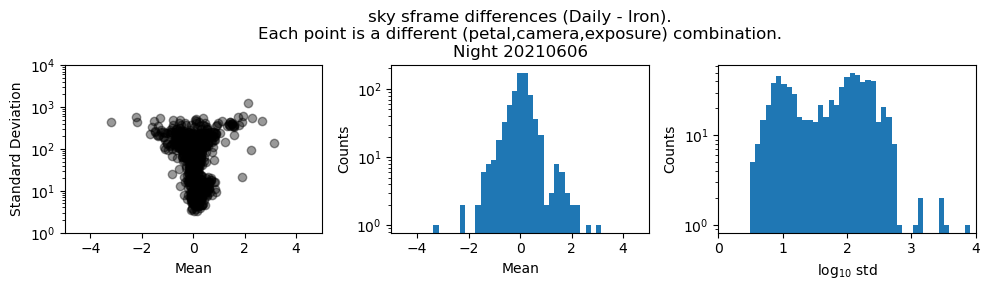

In [91]:
a = plot_differences(20210606)

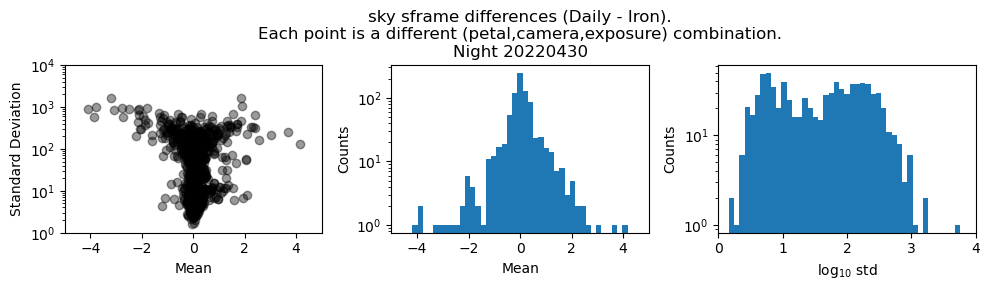

In [92]:
a = plot_differences(20220430)

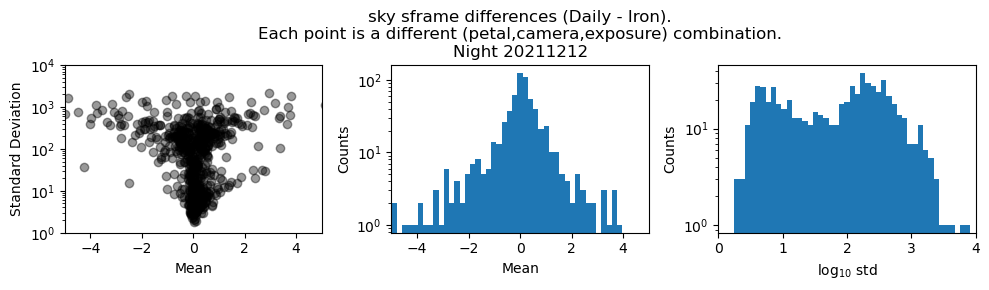

In [93]:
a = plot_differences(20211212)

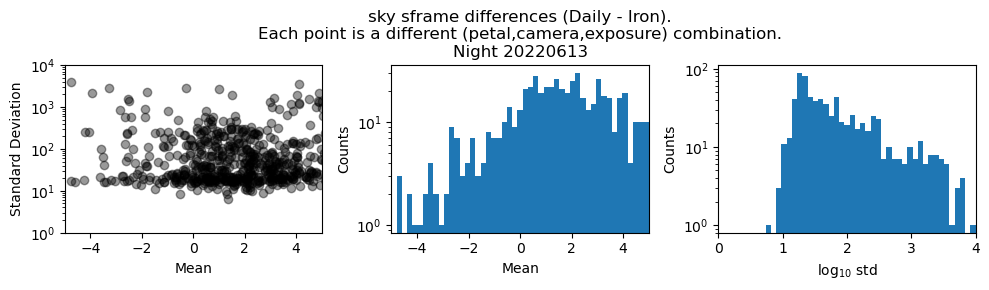

In [94]:
a = plot_differences(20220613)

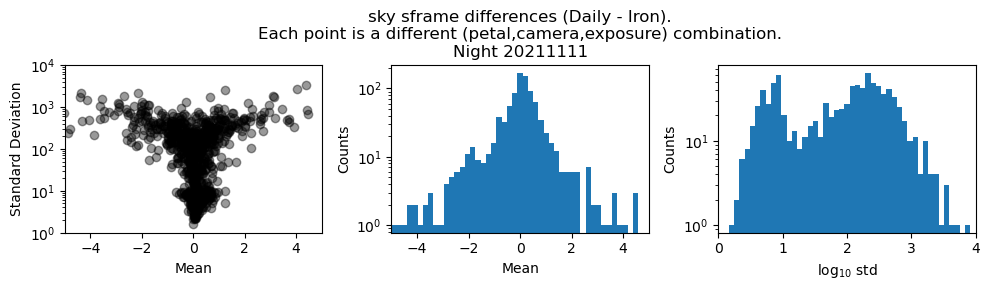

In [95]:
a = plot_differences(20211111)